In [3]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

# 랜덤시드 고정시키기
np.random.seed(3)

In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [39]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 padding='same',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 28, 28, 64)        8256      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               1605760   
_________________________________________________________________
dense_32 (Dense)             (None, 10)                1290      
Total params: 1,615,626
Trainable params: 1,615,626
Non-trainable params: 0
_________________________________________________________________


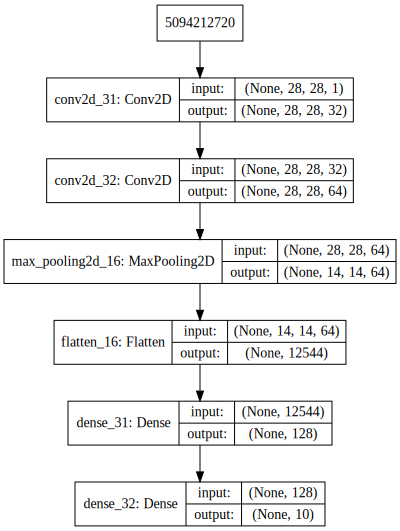

In [40]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [41]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
hist = model.fit(x_train, y_train, batch_size=256, epochs=5, verbose=1)

Epoch 1/5
60000/60000 [==============================] - 361s 6ms/step - loss: 0.1254 - acc: 0.9636
Epoch 2/5
60000/60000 [==============================] - 351s 6ms/step - loss: 0.0634 - acc: 0.9809
Epoch 3/5
60000/60000 [==============================] - 350s 6ms/step - loss: 0.0435 - acc: 0.9872
Epoch 4/5
60000/60000 [==============================] - 351s 6ms/step - loss: 0.0333 - acc: 0.9898
Epoch 5/5
60000/60000 [==============================] - 350s 6ms/step - loss: 0.0262 - acc: 0.9922


In [44]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03888282934107119
Test accuracy: 0.9867


In [45]:
import random
import matplotlib.pyplot as plt

plt.style.use('dark_background')

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

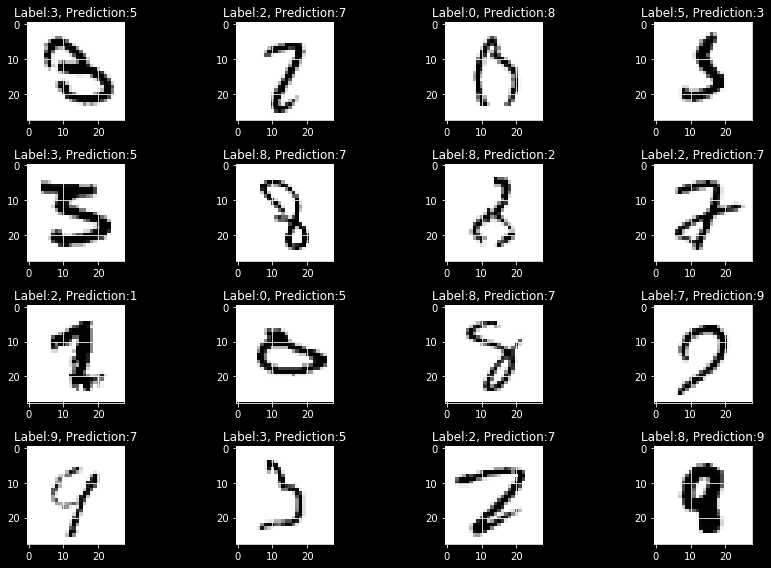

In [46]:
wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in wrong_result[:nrows*ncols]:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()